In [67]:
import numpy
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
print(tf.test.is_built_with_cuda)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.2.0
tensorboard2.2.2
seaborn0.10.1
<function is_built_with_cuda at 0x000002F1A6CDE1F0>
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14805295761476488376,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1712075353683734166
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6515012665
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14879271512923855214
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5318623366781945713
 physical_device_desc: "device: XLA_GPU device"]

In [8]:
help(shap.DeepExplainer)

Help on class DeepExplainer in module shap.explainers.deep:

class DeepExplainer(shap.explainers.explainer.Explainer)
 |  DeepExplainer(model, data, session=None, learning_phase_flags=None)
 |  
 |  Meant to approximate SHAP values for deep learning models.
 |  
 |  This is an enhanced version of the DeepLIFT algorithm (Deep SHAP) where, similar to Kernel SHAP, we
 |  approximate the conditional expectations of SHAP values using a selection of background samples.
 |  Lundberg and Lee, NIPS 2017 showed that the per node attribution rules in DeepLIFT (Shrikumar,
 |  Greenside, and Kundaje, arXiv 2017) can be chosen to approximate Shapley values. By integrating
 |  over many backgound samples DeepExplainer estimates approximate SHAP values such that they sum
 |  up to the difference between the expected model output on the passed background samples and the
 |  current model output (f(x) - E[f(x)]).
 |  
 |  Method resolution order:
 |      DeepExplainer
 |      shap.explainers.explainer.E

In [3]:
data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')

os.listdir(test_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
image_shape =(250, 250, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical',  shuffle=False)
test_image_gen.class_indices

Found 750 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [6]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
e = shap.DeepExplainer(tf.keras.models.load_model('flowers'), background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F1D5D10B20> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F1D5E2C460>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F1D5E6D190> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F1D5E73490>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F1D5E736D0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F1D5E79550>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x000002F1D5E79EE0> and <tensorflow.python.keras.layers.core.Dropout object at 0x000002F1D5E813D0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Den

keras is no longer supported, please use tf.keras instead.


In [136]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
e = shap.KernelExplainer(tf.keras.models.load_model('flowers'), background)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F3C1513CA0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F3C15D4A30>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F3C15A4310> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F3C1639C70>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002F3C14EC1F0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002F3C14F04F0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x000002F3C14F0A00> and <tensorflow.python.keras.layers.core.Dropout object at 0x000002F3C15174F0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Den

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'T'

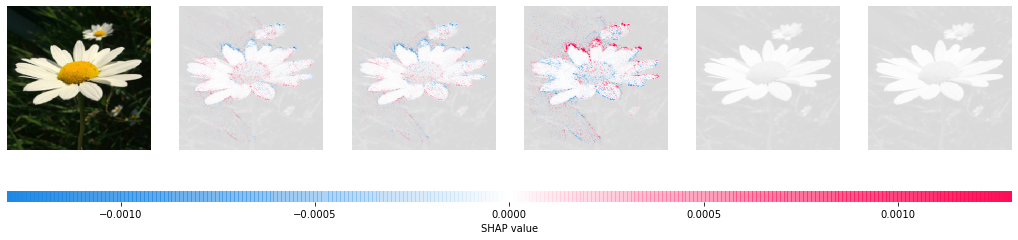

In [92]:
shap_values = e.shap_values(X_test[1:2])
shap.image_plot(shap_values=shap_values, pixel_values= X_test[1:2])#, labels=np.array(li

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


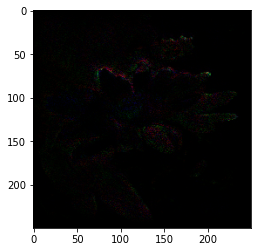

In [133]:
plt.imshow((shap_values[2][0]*255))

In [134]:
help(e.shap_values)

Help on method shap_values in module shap.explainers.deep:

shap_values(X, ranked_outputs=None, output_rank_order='max', check_additivity=True) method of shap.explainers.deep.DeepExplainer instance
    Return approximate SHAP values for the model applied to the data given by X.
    
    Parameters
    ----------
    X : list,
        if framework == 'tensorflow': numpy.array, or pandas.DataFrame
        if framework == 'pytorch': torch.tensor
        A tensor (or list of tensors) of samples (where X.shape[0] == # samples) on which to
        explain the model's output.
    
    ranked_outputs : None or int
        If ranked_outputs is None then we explain all the outputs in a multi-output model. If
        ranked_outputs is a positive integer then we only explain that many of the top model
        outputs (where "top" is determined by output_rank_order). Note that this causes a pair
        of values to be returned (shap_values, indexes), where shap_values is a list of numpy
        ar

In [ ]:
# for i in test_image_gen:
#     for image in i[0]:
#         print(image)
#         plt.imshow((image))
#         plt.show()
#     idx = (test_image_gen.batch_index - 1) + test_image_gen.batch_size
#     print (idx)
#     print(test_image_gen.filenames[idx : idx + test_image_gen.batch_size])

In [ ]:
model =tf.keras.models.load_model('flowers')
model.summary()

In [ ]:
history = pd.read_csv("history_catsdogs.csv")
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [ ]:

test_image_gen.classes

In [ ]:
test_image_gen.next()[0]

In [ ]:
pred = model.predict(test_image_gen)

In [ ]:
predictions=[]
for values in pred:
    predictions.append(numpy.where(values == numpy.amax(values))[0][0])

In [ ]:
# predictions = pred > 0.5
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions, target_names = list(test_image_gen.class_indices.keys())))

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
kr.plot_cm_categorical(test_image_gen.classes, predictions, test_image_gen.class_indices)

In [ ]:
from tensorflow.keras.preprocessing import image
dog_image_path = test_path + '/tulip/' + os.listdir(test_path + '/tulip/')[5]
# plt.imshow(imread(dog_image))
my_image = image.load_img(dog_image_path, target_size=image_shape)
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

In [ ]:
model.predict_classes(my_img_arr)

In [ ]:
model.input.shape

In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [ ]:
from tensorflow.keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.inputs, outputs=model.layers[2].output)

# returns a list of Numpy arrays: one array per layer activation
feature_maps  = activation_model.predict(my_img_arr)

# activation of the 1st convolution layer
first_layer_activation = feature_maps[0]

# # display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(feature_maps[0, :, :, 1], cmap='viridis')

In [ ]:
activation_model.summary()

In [ ]:

# plot all 64 maps in an 8x8 squares
square = 5
ix = 1
plt.figure(figsize=(12,12))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure

plt.show()

In [ ]:
from keras.applications.imagenet_utils import decode_predictions 
resnet = tf.keras.applications.ResNet152()


In [ ]:
dog_image_path = test_path + '/tulip/' + os.listdir(test_path + '/tulip/')[5]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)
sample_img_arr = np.expand_dims(sample_img_arr, axis =0)
predictions = resnet.predict(sample_img_arr)
print(decode_predictions(predictions))
print('Predicted:', decode_predictions(predictions, top=3)[0][0][1])

In [ ]:
print(predictions[0])

In [ ]:
sum(predictions[0])

In [ ]:
help(test_gen)

In [ ]:
tulip_image_path = test_path + '/tulip/' + os.listdir(test_path + '/tulip/')[20]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(tulip_image_path, target_size=(250, 250, 3))
plt.imshow(imread(tulip_image_path))
sample_img_arr = image.img_to_array(sample_image)
standardized_image = test_gen.standardize(sample_img_arr)

import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(standardized_image.astype("double"), model.predict)

In [ ]:
plt.imshow(standardized_image)

In [ ]:
from skimage.segmentation import mark_boundaries
# Get image and mask shows us the superpixels that the model found to be
# most relevant to making a prediction
# The argument with the value of 1 in this method is the class that we want LIME to explain
# temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, num_features = 5)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[4] , positive_only=True, 
                                            negative_only=False, hide_rest=True, num_features = 10, min_weight=0)

plt.imshow(mark_boundaries(temp , mask))


In [ ]:
explanation.top_labels

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[4], positive_only=False, negative_only=True, num_features=100, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
plt.imshow(temp)

In [ ]:
model.predict_classes(np.expand_dims(temp, axis =0))

In [ ]:
model.predict_proba(np.expand_dims(standardized_image, axis =0))

In [ ]:
# dog_image_path = test_path + '/tulip/' + os.listdir(test_path + '/tulip/')
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)

In [ ]:
help(image)

In [ ]:
help(e.shap_values)

In [ ]:
import shap
import numpy as np
e = shap.DeepExplainer(model, sample_img_arr.reshape(1,250,250,3))
shap_values = e.shap_values(test_image_gen.next()[0])
shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5], output_rank_order=2)
shap.image_plot(shap_values=shap_values, pixel_values= X_test[1:5])#, labels=np.array(li

In [ ]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5], output_rank_order=2)
shap.image_plot(shap_values=shap_values, pixel_values= X_test[1:5])#, labels=np.array(li

In [ ]:
help(image)

In [ ]:
help(e.shap_values)

In [ ]:
import shap
import numpy as np
e = shap.DeepExplainer(model, sample_img_arr.reshape(1,250,250,3))
shap_values = e.shap_values(test_image_gen.next()[0])
shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5], output_rank_order=2)
shap.image_plot(shap_values=shap_values, pixel_values= X_test[1:5])#, labels=np.array(li